***Task 5.2***
| 65011428 Papinwich Asnapetch

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

(364, 512, 3)


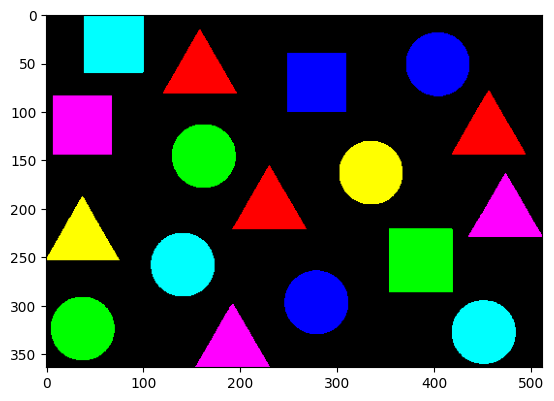

In [2]:
# Load Image
img = cv2.imread('colorobject.png')
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.imshow(img_RGB)
print(img_RGB.shape)

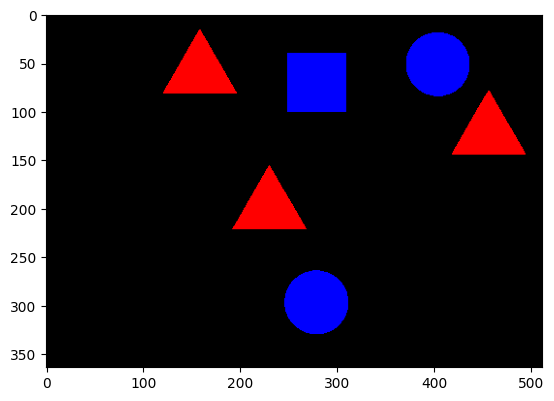

In [3]:
# Filter blue
upper_blue = (140, 255, 255)
lower_blue = (120, 50, 50)
mask_blue = cv2.inRange(img_HSV, lower_blue, upper_blue)
mask_blue = cv2.cvtColor(mask_blue, cv2.COLOR_GRAY2BGR)


# Filter red
upper_red = (20, 255, 255)
lower_red = (0, 50, 50)
mask_red = cv2.inRange(img_HSV, lower_red, upper_red)
mask_red = cv2.cvtColor(mask_red, cv2.COLOR_GRAY2BGR)


# Mask red & blue region
mask_BR = mask_blue + mask_red
BR = cv2.bitwise_and(img_RGB, mask_BR)

# Display
plt.imshow(BR)

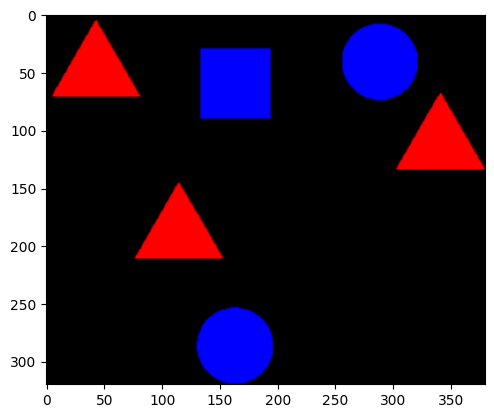

In [4]:
# Crop image
img_cropped = cv2.getRectSubPix(BR, (380, 320), (305, 170))
plt.imshow(img_cropped)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


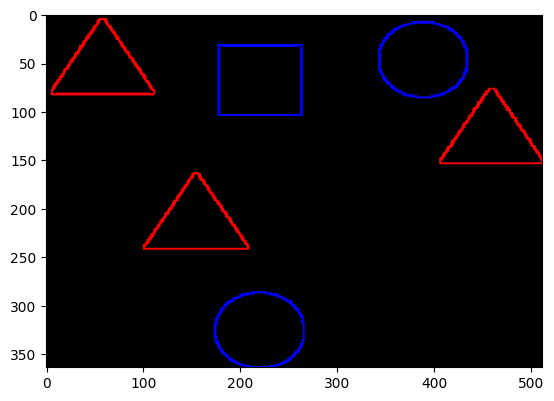

In [5]:
# Apply Laplacian
res = cv2.Laplacian(img_cropped, cv2.CV_64F, ksize= 3)

res = cv2.resize(res, (512, 364))

plt.imshow(res)